# 19장 세상에 없는 얼굴 GAN, 오토인코더

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch19-colab.ipynb)

## 3. 적대적 신경망 실행하기

### 실습: GAN 모델 만들기

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

# 예제 파일에서 data 폴더 아래에 이미지가 저장될 gan_images 폴더가 함께 제공됩니다.
# 만약 이미지가 저장될 폴더가 없다면 아래 코드의 주석을 해제해 gan_images 폴더를 만듭니다.
# import os
# if not os.path.exists("./data/gan_images"):
#    os.makedirs("./data/gan_images")

# 생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

# 판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False 
# 판별자의 변경된 가중치는 생성자의 가중치를 업데이트하는데 활용
# 판별자 자신이 학습되지는 않음

# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
epoch:0  d_loss:0.7415  g_loss:0.7120
1/1 [==============================] - 0s 16ms/step
epoch:1  d_loss:0.5094  g_loss:0.4432
1/1 [==============================] - 0s 16ms/step
epoch:2  d_loss:0.5000  g_loss:0.1940
1/1 [==============================] - 0s 14ms/step
epoch:3  d_loss:0.5102  g_loss:0.1223
1/1 [==============================] - 0s 16ms/step
epoch:4  d_loss:0.5036  g_loss:0.1455
1/1 [==============================] - 0s 16ms/step
epoch:5  d_loss:0.4504  g_loss:0.2810
1/1 [==============================] - 0s 15ms/step
epoch:6  d_loss:0.4622  g_loss:0.4361
1/1 [==============================] - 0s 16ms/step
epoch:7  d_loss:0.4591  g_loss:0.5205
1/1 [==============================] - 0s 15ms/step
epoch:8  d_loss:0.4457  g_loss:0.5296
1/1 [==============================] - 0s 16ms/step
epoch:9  d_loss:0.4385  g_loss:0.4869
1/1 [==============================] - 0s 16ms/step
epoch:10  d_loss:0.4585  g_loss:0.4417
1/1 [===

epoch:89  d_loss:0.3667  g_loss:2.7474
1/1 [==============================] - 0s 16ms/step
epoch:90  d_loss:0.2669  g_loss:2.5821
1/1 [==============================] - 0s 15ms/step
epoch:91  d_loss:0.3300  g_loss:2.6659
1/1 [==============================] - 0s 17ms/step
epoch:92  d_loss:0.2457  g_loss:2.8826
1/1 [==============================] - 0s 15ms/step
epoch:93  d_loss:0.3394  g_loss:2.4649
1/1 [==============================] - 0s 17ms/step
epoch:94  d_loss:0.6523  g_loss:2.5271
1/1 [==============================] - 0s 15ms/step
epoch:95  d_loss:0.3702  g_loss:3.1663
1/1 [==============================] - 0s 15ms/step
epoch:96  d_loss:0.6369  g_loss:2.0145
1/1 [==============================] - 0s 16ms/step
epoch:97  d_loss:0.7111  g_loss:1.6205
1/1 [==============================] - 0s 16ms/step
epoch:98  d_loss:0.6860  g_loss:1.3101
1/1 [==============================] - 0s 16ms/step
epoch:99  d_loss:0.5564  g_loss:1.6826
1/1 [==============================] - 0s 15ms/step

1/1 [==============================] - 0s 16ms/step
epoch:179  d_loss:0.6514  g_loss:1.3246
1/1 [==============================] - 0s 16ms/step
epoch:180  d_loss:0.6838  g_loss:1.2455
1/1 [==============================] - 0s 15ms/step
epoch:181  d_loss:0.6882  g_loss:0.9993
1/1 [==============================] - 0s 16ms/step
epoch:182  d_loss:0.6615  g_loss:1.2183
1/1 [==============================] - 0s 17ms/step
epoch:183  d_loss:0.6276  g_loss:1.1583
1/1 [==============================] - 0s 15ms/step
epoch:184  d_loss:0.6750  g_loss:1.2488
1/1 [==============================] - 0s 17ms/step
epoch:185  d_loss:0.4709  g_loss:1.6245
1/1 [==============================] - 0s 15ms/step
epoch:186  d_loss:0.4298  g_loss:1.6801
1/1 [==============================] - 0s 16ms/step
epoch:187  d_loss:0.4805  g_loss:1.5850
1/1 [==============================] - 0s 16ms/step
epoch:188  d_loss:0.5287  g_loss:1.5551
1/1 [==============================] - 0s 16ms/step
epoch:189  d_loss:0.4104  g_

1/1 [==============================] - 0s 15ms/step
epoch:267  d_loss:0.4953  g_loss:1.8533
1/1 [==============================] - 0s 16ms/step
epoch:268  d_loss:0.4871  g_loss:2.2955
1/1 [==============================] - 0s 15ms/step
epoch:269  d_loss:0.3624  g_loss:2.6684
1/1 [==============================] - 0s 16ms/step
epoch:270  d_loss:0.8367  g_loss:2.5606
1/1 [==============================] - 0s 16ms/step
epoch:271  d_loss:0.4409  g_loss:2.2414
1/1 [==============================] - 0s 17ms/step
epoch:272  d_loss:0.4776  g_loss:1.9705
1/1 [==============================] - 0s 15ms/step
epoch:273  d_loss:0.7077  g_loss:1.8529
1/1 [==============================] - 0s 17ms/step
epoch:274  d_loss:0.6634  g_loss:1.3350
1/1 [==============================] - 0s 17ms/step
epoch:275  d_loss:0.6180  g_loss:1.8163
1/1 [==============================] - 0s 16ms/step
epoch:276  d_loss:0.4772  g_loss:1.9412
1/1 [==============================] - 0s 17ms/step
epoch:277  d_loss:0.5233  g_

1/1 [==============================] - 0s 17ms/step
epoch:356  d_loss:0.4108  g_loss:1.5761
1/1 [==============================] - 0s 16ms/step
epoch:357  d_loss:0.4381  g_loss:1.7162
1/1 [==============================] - 0s 16ms/step
epoch:358  d_loss:0.3223  g_loss:2.2573
1/1 [==============================] - 0s 15ms/step
epoch:359  d_loss:0.4139  g_loss:2.0560
1/1 [==============================] - 0s 17ms/step
epoch:360  d_loss:0.3437  g_loss:1.8824
1/1 [==============================] - 0s 16ms/step
epoch:361  d_loss:0.3906  g_loss:1.7090
1/1 [==============================] - 0s 17ms/step
epoch:362  d_loss:0.4565  g_loss:1.6516
1/1 [==============================] - 0s 16ms/step
epoch:363  d_loss:0.4261  g_loss:1.5605
1/1 [==============================] - 0s 17ms/step
epoch:364  d_loss:0.3284  g_loss:1.6519
1/1 [==============================] - 0s 15ms/step
epoch:365  d_loss:0.3756  g_loss:1.5916
1/1 [==============================] - 0s 20ms/step
epoch:366  d_loss:0.4482  g_

1/1 [==============================] - 0s 14ms/step
epoch:444  d_loss:0.3071  g_loss:2.0345
1/1 [==============================] - 0s 15ms/step
epoch:445  d_loss:0.2110  g_loss:2.4513
1/1 [==============================] - 0s 15ms/step
epoch:446  d_loss:0.3279  g_loss:2.5772
1/1 [==============================] - 0s 14ms/step
epoch:447  d_loss:0.3201  g_loss:2.5470
1/1 [==============================] - 0s 16ms/step
epoch:448  d_loss:0.4250  g_loss:1.6812
1/1 [==============================] - 0s 16ms/step
epoch:449  d_loss:0.3886  g_loss:1.6308
1/1 [==============================] - 0s 15ms/step
epoch:450  d_loss:0.3191  g_loss:2.0506
1/1 [==============================] - 0s 16ms/step
epoch:451  d_loss:0.3070  g_loss:2.1473
1/1 [==============================] - 0s 17ms/step
epoch:452  d_loss:0.2295  g_loss:2.7478
1/1 [==============================] - 0s 16ms/step
epoch:453  d_loss:0.2922  g_loss:2.6452
1/1 [==============================] - 0s 15ms/step
epoch:454  d_loss:0.3400  g_

1/1 [==============================] - 0s 16ms/step
epoch:533  d_loss:0.3929  g_loss:1.7818
1/1 [==============================] - 0s 17ms/step
epoch:534  d_loss:0.2087  g_loss:2.8769
1/1 [==============================] - 0s 16ms/step
epoch:535  d_loss:0.2911  g_loss:3.4254
1/1 [==============================] - 0s 16ms/step
epoch:536  d_loss:0.1342  g_loss:3.6804
1/1 [==============================] - 0s 17ms/step
epoch:537  d_loss:0.1609  g_loss:3.9562
1/1 [==============================] - 0s 16ms/step
epoch:538  d_loss:0.1777  g_loss:2.7597
1/1 [==============================] - 0s 16ms/step
epoch:539  d_loss:0.2049  g_loss:2.5514
1/1 [==============================] - 0s 17ms/step
epoch:540  d_loss:0.0830  g_loss:2.5810
1/1 [==============================] - 0s 14ms/step
epoch:541  d_loss:0.1375  g_loss:2.5257
1/1 [==============================] - 0s 16ms/step
epoch:542  d_loss:0.1307  g_loss:3.4246
1/1 [==============================] - 0s 15ms/step
epoch:543  d_loss:0.0820  g_

1/1 [==============================] - 0s 14ms/step
epoch:621  d_loss:0.7229  g_loss:0.6405
1/1 [==============================] - 0s 16ms/step
epoch:622  d_loss:0.7193  g_loss:0.9424
1/1 [==============================] - 0s 18ms/step
epoch:623  d_loss:0.6363  g_loss:1.0129
1/1 [==============================] - 0s 15ms/step
epoch:624  d_loss:0.9674  g_loss:0.6300
1/1 [==============================] - 0s 17ms/step
epoch:625  d_loss:1.2286  g_loss:0.6474
1/1 [==============================] - 0s 18ms/step
epoch:626  d_loss:0.8734  g_loss:0.5143
1/1 [==============================] - 0s 16ms/step
epoch:627  d_loss:0.9766  g_loss:1.1518
1/1 [==============================] - 0s 16ms/step
epoch:628  d_loss:0.9235  g_loss:0.9076
1/1 [==============================] - 0s 16ms/step
epoch:629  d_loss:1.1033  g_loss:0.8972
1/1 [==============================] - 0s 18ms/step
epoch:630  d_loss:1.0488  g_loss:0.7640
1/1 [==============================] - 0s 18ms/step
epoch:631  d_loss:0.7626  g_

1/1 [==============================] - 0s 17ms/step
epoch:710  d_loss:0.3590  g_loss:1.8130
1/1 [==============================] - 0s 21ms/step
epoch:711  d_loss:0.3037  g_loss:1.8966
1/1 [==============================] - 0s 15ms/step
epoch:712  d_loss:0.2934  g_loss:1.9528
1/1 [==============================] - 0s 15ms/step
epoch:713  d_loss:0.3551  g_loss:1.8728
1/1 [==============================] - 0s 16ms/step
epoch:714  d_loss:0.3735  g_loss:2.3429
1/1 [==============================] - 0s 17ms/step
epoch:715  d_loss:0.3436  g_loss:1.9636
1/1 [==============================] - 0s 17ms/step
epoch:716  d_loss:0.2867  g_loss:2.4587
1/1 [==============================] - 0s 15ms/step
epoch:717  d_loss:0.2759  g_loss:2.3283
1/1 [==============================] - 0s 17ms/step
epoch:718  d_loss:0.3099  g_loss:2.1517
1/1 [==============================] - 0s 16ms/step
epoch:719  d_loss:0.2614  g_loss:2.4708
1/1 [==============================] - 0s 18ms/step
epoch:720  d_loss:0.2302  g_

1/1 [==============================] - 0s 15ms/step
epoch:799  d_loss:0.5752  g_loss:1.7258
1/1 [==============================] - 0s 21ms/step
epoch:800  d_loss:0.5147  g_loss:1.4563
1/1 [==============================] - 0s 15ms/step
epoch:801  d_loss:0.3256  g_loss:2.1386
1/1 [==============================] - 0s 16ms/step
epoch:802  d_loss:0.3241  g_loss:2.0559
1/1 [==============================] - 0s 15ms/step
epoch:803  d_loss:0.3429  g_loss:2.3838
1/1 [==============================] - 0s 16ms/step
epoch:804  d_loss:0.4463  g_loss:1.8871
1/1 [==============================] - 0s 15ms/step
epoch:805  d_loss:0.2478  g_loss:1.9756
1/1 [==============================] - 0s 16ms/step
epoch:806  d_loss:0.4486  g_loss:1.6024
1/1 [==============================] - 0s 16ms/step
epoch:807  d_loss:0.4481  g_loss:1.7003
1/1 [==============================] - 0s 16ms/step
epoch:808  d_loss:0.3698  g_loss:1.8359
1/1 [==============================] - 0s 17ms/step
epoch:809  d_loss:0.4141  g_

1/1 [==============================] - 0s 15ms/step
epoch:887  d_loss:0.4558  g_loss:2.0757
1/1 [==============================] - 0s 16ms/step
epoch:888  d_loss:0.5997  g_loss:1.9412
1/1 [==============================] - 0s 17ms/step
epoch:889  d_loss:0.4683  g_loss:1.5598
1/1 [==============================] - 0s 16ms/step
epoch:890  d_loss:0.6209  g_loss:1.7257
1/1 [==============================] - 0s 16ms/step
epoch:891  d_loss:0.5289  g_loss:1.3218
1/1 [==============================] - 0s 15ms/step
epoch:892  d_loss:0.5633  g_loss:1.5497
1/1 [==============================] - 0s 14ms/step
epoch:893  d_loss:0.6424  g_loss:1.2731
1/1 [==============================] - 0s 14ms/step
epoch:894  d_loss:0.5195  g_loss:1.8273
1/1 [==============================] - 0s 15ms/step
epoch:895  d_loss:0.6446  g_loss:1.7855
1/1 [==============================] - 0s 14ms/step
epoch:896  d_loss:0.7908  g_loss:1.5155
1/1 [==============================] - 0s 21ms/step
epoch:897  d_loss:0.7650  g_

1/1 [==============================] - 0s 15ms/step
epoch:976  d_loss:0.4675  g_loss:1.7607
1/1 [==============================] - 0s 16ms/step
epoch:977  d_loss:0.4213  g_loss:1.8756
1/1 [==============================] - 0s 15ms/step
epoch:978  d_loss:0.4361  g_loss:1.7308
1/1 [==============================] - 0s 16ms/step
epoch:979  d_loss:0.4826  g_loss:1.9024
1/1 [==============================] - 0s 15ms/step
epoch:980  d_loss:0.3933  g_loss:1.9653
1/1 [==============================] - 0s 16ms/step
epoch:981  d_loss:0.3759  g_loss:2.0358
1/1 [==============================] - 0s 16ms/step
epoch:982  d_loss:0.3946  g_loss:2.2436
1/1 [==============================] - 0s 15ms/step
epoch:983  d_loss:0.4313  g_loss:1.9332
1/1 [==============================] - 0s 16ms/step
epoch:984  d_loss:0.4954  g_loss:1.2680
1/1 [==============================] - 0s 15ms/step
epoch:985  d_loss:0.4826  g_loss:1.4062
1/1 [==============================] - 0s 15ms/step
epoch:986  d_loss:0.3621  g_

1/1 [==============================] - 0s 16ms/step
epoch:1064  d_loss:0.2871  g_loss:2.0526
1/1 [==============================] - 0s 15ms/step
epoch:1065  d_loss:0.2787  g_loss:2.2083
1/1 [==============================] - 0s 15ms/step
epoch:1066  d_loss:0.1890  g_loss:2.5976
1/1 [==============================] - 0s 16ms/step
epoch:1067  d_loss:0.2776  g_loss:2.4747
1/1 [==============================] - 0s 15ms/step
epoch:1068  d_loss:0.2544  g_loss:2.4040
1/1 [==============================] - 0s 15ms/step
epoch:1069  d_loss:0.2952  g_loss:2.3683
1/1 [==============================] - 0s 16ms/step
epoch:1070  d_loss:0.2880  g_loss:1.8267
1/1 [==============================] - 0s 15ms/step
epoch:1071  d_loss:0.4557  g_loss:1.7140
1/1 [==============================] - 0s 15ms/step
epoch:1072  d_loss:0.2290  g_loss:2.5923
1/1 [==============================] - 0s 15ms/step
epoch:1073  d_loss:0.2855  g_loss:2.7501
1/1 [==============================] - 0s 16ms/step
epoch:1074  d_loss

1/1 [==============================] - 0s 16ms/step
epoch:1152  d_loss:0.3157  g_loss:2.2394
1/1 [==============================] - 0s 16ms/step
epoch:1153  d_loss:0.4601  g_loss:1.9330
1/1 [==============================] - 0s 16ms/step
epoch:1154  d_loss:0.2840  g_loss:2.1463
1/1 [==============================] - 0s 15ms/step
epoch:1155  d_loss:0.4574  g_loss:2.3981
1/1 [==============================] - 0s 16ms/step
epoch:1156  d_loss:0.2697  g_loss:2.7518
1/1 [==============================] - 0s 16ms/step
epoch:1157  d_loss:0.4312  g_loss:2.3232
1/1 [==============================] - 0s 19ms/step
epoch:1158  d_loss:0.3692  g_loss:2.5201
1/1 [==============================] - 0s 16ms/step
epoch:1159  d_loss:0.2577  g_loss:2.4690
1/1 [==============================] - 0s 18ms/step
epoch:1160  d_loss:0.5316  g_loss:2.0168
1/1 [==============================] - 0s 17ms/step
epoch:1161  d_loss:0.3737  g_loss:1.9570
1/1 [==============================] - 0s 18ms/step
epoch:1162  d_loss

epoch:1239  d_loss:0.3630  g_loss:2.4670
1/1 [==============================] - 0s 15ms/step
epoch:1240  d_loss:0.2080  g_loss:2.4761
1/1 [==============================] - 0s 16ms/step
epoch:1241  d_loss:0.3919  g_loss:2.3938
1/1 [==============================] - 0s 16ms/step
epoch:1242  d_loss:0.4507  g_loss:1.8928
1/1 [==============================] - 0s 15ms/step
epoch:1243  d_loss:0.2681  g_loss:2.5903
1/1 [==============================] - 0s 15ms/step
epoch:1244  d_loss:0.3408  g_loss:2.2778
1/1 [==============================] - 0s 17ms/step
epoch:1245  d_loss:0.5120  g_loss:2.3853
1/1 [==============================] - 0s 15ms/step
epoch:1246  d_loss:0.3953  g_loss:2.1921
1/1 [==============================] - 0s 17ms/step
epoch:1247  d_loss:0.4471  g_loss:1.9023
1/1 [==============================] - 0s 15ms/step
epoch:1248  d_loss:0.5087  g_loss:1.9468
1/1 [==============================] - 0s 15ms/step
epoch:1249  d_loss:0.2996  g_loss:2.4948
1/1 [========================

1/1 [==============================] - 0s 14ms/step
epoch:1328  d_loss:0.3452  g_loss:1.9480
1/1 [==============================] - 0s 18ms/step
epoch:1329  d_loss:0.4953  g_loss:1.8477
1/1 [==============================] - 0s 15ms/step
epoch:1330  d_loss:0.3783  g_loss:1.6918
1/1 [==============================] - 0s 16ms/step
epoch:1331  d_loss:0.2576  g_loss:2.1627
1/1 [==============================] - 0s 15ms/step
epoch:1332  d_loss:0.3478  g_loss:2.7000
1/1 [==============================] - 0s 15ms/step
epoch:1333  d_loss:0.3793  g_loss:2.2757
1/1 [==============================] - 0s 15ms/step
epoch:1334  d_loss:0.4489  g_loss:1.9053
1/1 [==============================] - 0s 15ms/step
epoch:1335  d_loss:0.4972  g_loss:2.1403
1/1 [==============================] - 0s 15ms/step
epoch:1336  d_loss:0.3328  g_loss:1.8606
1/1 [==============================] - 0s 17ms/step
epoch:1337  d_loss:0.4096  g_loss:2.4069
1/1 [==============================] - 0s 15ms/step
epoch:1338  d_loss

epoch:1415  d_loss:0.4115  g_loss:2.3549
1/1 [==============================] - 0s 16ms/step
epoch:1416  d_loss:0.4521  g_loss:1.6469
1/1 [==============================] - 0s 17ms/step
epoch:1417  d_loss:0.3202  g_loss:2.0789
1/1 [==============================] - 0s 16ms/step
epoch:1418  d_loss:0.4006  g_loss:2.0519
1/1 [==============================] - 0s 16ms/step
epoch:1419  d_loss:0.4012  g_loss:2.2617
1/1 [==============================] - 0s 15ms/step
epoch:1420  d_loss:0.2869  g_loss:2.3388
1/1 [==============================] - 0s 17ms/step
epoch:1421  d_loss:0.3552  g_loss:1.8859
1/1 [==============================] - 0s 16ms/step
epoch:1422  d_loss:0.3475  g_loss:2.4320
1/1 [==============================] - 0s 15ms/step
epoch:1423  d_loss:0.3173  g_loss:2.2743
1/1 [==============================] - 0s 16ms/step
epoch:1424  d_loss:0.3397  g_loss:2.1642
1/1 [==============================] - 0s 16ms/step
epoch:1425  d_loss:0.3526  g_loss:2.1471
1/1 [========================

1/1 [==============================] - 0s 16ms/step
epoch:1504  d_loss:0.3648  g_loss:2.2996
1/1 [==============================] - 0s 15ms/step
epoch:1505  d_loss:0.5288  g_loss:1.7998
1/1 [==============================] - 0s 17ms/step
epoch:1506  d_loss:0.4279  g_loss:2.3285
1/1 [==============================] - 0s 16ms/step
epoch:1507  d_loss:0.3161  g_loss:2.1106
1/1 [==============================] - 0s 15ms/step
epoch:1508  d_loss:0.3665  g_loss:1.7396
1/1 [==============================] - 0s 16ms/step
epoch:1509  d_loss:0.3160  g_loss:1.6114
1/1 [==============================] - 0s 15ms/step
epoch:1510  d_loss:0.4952  g_loss:1.6311
1/1 [==============================] - 0s 15ms/step
epoch:1511  d_loss:0.4469  g_loss:1.9734
1/1 [==============================] - 0s 16ms/step
epoch:1512  d_loss:0.5061  g_loss:2.0859
1/1 [==============================] - 0s 17ms/step
epoch:1513  d_loss:0.2829  g_loss:2.5299
1/1 [==============================] - 0s 16ms/step
epoch:1514  d_loss

1/1 [==============================] - 0s 14ms/step
epoch:1592  d_loss:0.5409  g_loss:1.6555
1/1 [==============================] - 0s 15ms/step
epoch:1593  d_loss:0.5143  g_loss:1.7425
1/1 [==============================] - 0s 16ms/step
epoch:1594  d_loss:0.4928  g_loss:1.7530
1/1 [==============================] - 0s 15ms/step
epoch:1595  d_loss:0.5463  g_loss:1.8047
1/1 [==============================] - 0s 17ms/step
epoch:1596  d_loss:0.4184  g_loss:1.9025
1/1 [==============================] - 0s 16ms/step
epoch:1597  d_loss:0.5583  g_loss:1.8712
1/1 [==============================] - 0s 15ms/step
epoch:1598  d_loss:0.4411  g_loss:1.7421
1/1 [==============================] - 0s 15ms/step
epoch:1599  d_loss:0.4362  g_loss:1.6773
1/1 [==============================] - 0s 16ms/step
epoch:1600  d_loss:0.4528  g_loss:1.9498
1/1 [==============================] - 0s 15ms/step
epoch:1601  d_loss:0.3934  g_loss:2.0651
1/1 [==============================] - 0s 15ms/step
epoch:1602  d_loss

epoch:1679  d_loss:0.4396  g_loss:1.7841
1/1 [==============================] - 0s 16ms/step
epoch:1680  d_loss:0.4484  g_loss:1.6504
1/1 [==============================] - 0s 16ms/step
epoch:1681  d_loss:0.4790  g_loss:1.6434
1/1 [==============================] - 0s 15ms/step
epoch:1682  d_loss:0.5207  g_loss:1.5739
1/1 [==============================] - 0s 16ms/step
epoch:1683  d_loss:0.5382  g_loss:1.7187
1/1 [==============================] - 0s 15ms/step
epoch:1684  d_loss:0.4867  g_loss:1.6369
1/1 [==============================] - 0s 16ms/step
epoch:1685  d_loss:0.4606  g_loss:2.0674
1/1 [==============================] - 0s 15ms/step
epoch:1686  d_loss:0.3854  g_loss:2.0737
1/1 [==============================] - 0s 15ms/step
epoch:1687  d_loss:0.5473  g_loss:1.6746
1/1 [==============================] - 0s 15ms/step
epoch:1688  d_loss:0.4894  g_loss:1.4727
1/1 [==============================] - 0s 16ms/step
epoch:1689  d_loss:0.4292  g_loss:1.6427
1/1 [========================

1/1 [==============================] - 0s 16ms/step
epoch:1768  d_loss:0.4049  g_loss:1.7226
1/1 [==============================] - 0s 16ms/step
epoch:1769  d_loss:0.5934  g_loss:1.3355
1/1 [==============================] - 0s 15ms/step
epoch:1770  d_loss:0.6215  g_loss:1.3490
1/1 [==============================] - 0s 15ms/step
epoch:1771  d_loss:0.4184  g_loss:1.2620
1/1 [==============================] - 0s 14ms/step
epoch:1772  d_loss:0.5155  g_loss:1.5016
1/1 [==============================] - 0s 15ms/step
epoch:1773  d_loss:0.4983  g_loss:1.9444
1/1 [==============================] - 0s 17ms/step
epoch:1774  d_loss:0.5069  g_loss:1.8576
1/1 [==============================] - 0s 15ms/step
epoch:1775  d_loss:0.6132  g_loss:1.7958
1/1 [==============================] - 0s 16ms/step
epoch:1776  d_loss:0.7006  g_loss:1.5407
1/1 [==============================] - 0s 16ms/step
epoch:1777  d_loss:0.4842  g_loss:1.5825
1/1 [==============================] - 0s 15ms/step
epoch:1778  d_loss

epoch:1855  d_loss:0.4784  g_loss:1.4941
1/1 [==============================] - 0s 16ms/step
epoch:1856  d_loss:0.5643  g_loss:1.8756
1/1 [==============================] - 0s 16ms/step
epoch:1857  d_loss:0.4571  g_loss:1.7719
1/1 [==============================] - 0s 15ms/step
epoch:1858  d_loss:0.5806  g_loss:1.5787
1/1 [==============================] - 0s 17ms/step
epoch:1859  d_loss:0.4339  g_loss:1.8230
1/1 [==============================] - 0s 15ms/step
epoch:1860  d_loss:0.3972  g_loss:1.7157
1/1 [==============================] - 0s 15ms/step
epoch:1861  d_loss:0.3812  g_loss:1.6082
1/1 [==============================] - 0s 15ms/step
epoch:1862  d_loss:0.5500  g_loss:1.6156
1/1 [==============================] - 0s 15ms/step
epoch:1863  d_loss:0.5590  g_loss:1.6743
1/1 [==============================] - 0s 16ms/step
epoch:1864  d_loss:0.4508  g_loss:1.5064
1/1 [==============================] - 0s 15ms/step
epoch:1865  d_loss:0.6252  g_loss:1.8796
1/1 [========================

1/1 [==============================] - 0s 15ms/step
epoch:1944  d_loss:0.4969  g_loss:1.7939
1/1 [==============================] - 0s 16ms/step
epoch:1945  d_loss:0.6330  g_loss:1.3774
1/1 [==============================] - 0s 15ms/step
epoch:1946  d_loss:0.4674  g_loss:1.5572
1/1 [==============================] - 0s 15ms/step
epoch:1947  d_loss:0.5751  g_loss:1.4332
1/1 [==============================] - 0s 15ms/step
epoch:1948  d_loss:0.4608  g_loss:1.4102
1/1 [==============================] - 0s 16ms/step
epoch:1949  d_loss:0.4665  g_loss:1.7169
1/1 [==============================] - 0s 15ms/step
epoch:1950  d_loss:0.6226  g_loss:1.5889
1/1 [==============================] - 0s 16ms/step
epoch:1951  d_loss:0.5746  g_loss:1.5053
1/1 [==============================] - 0s 15ms/step
epoch:1952  d_loss:0.4626  g_loss:2.0267
1/1 [==============================] - 0s 16ms/step
epoch:1953  d_loss:0.5547  g_loss:1.9017
1/1 [==============================] - 0s 16ms/step
epoch:1954  d_loss

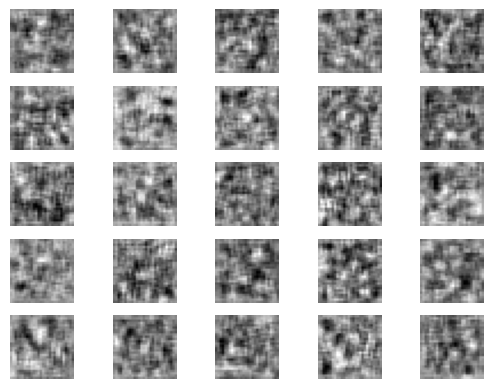

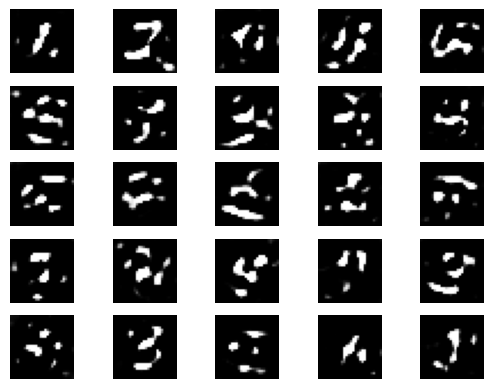

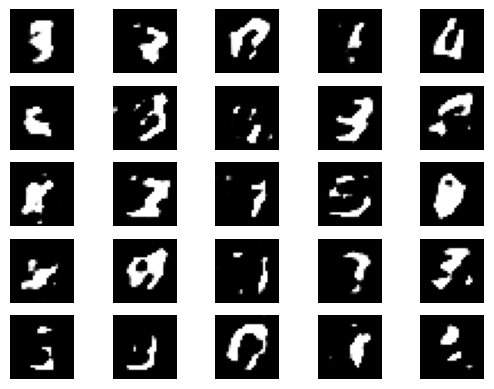

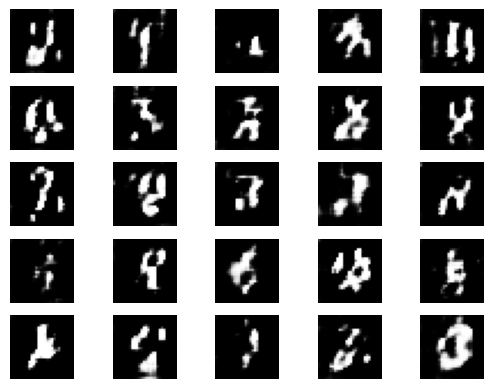

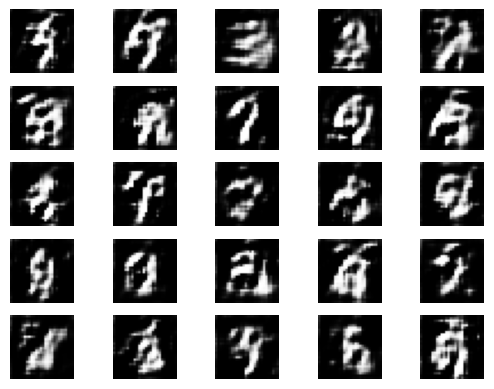

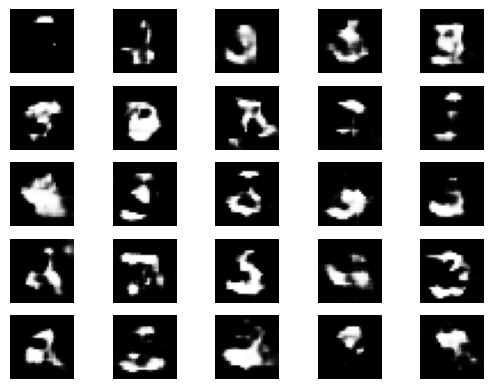

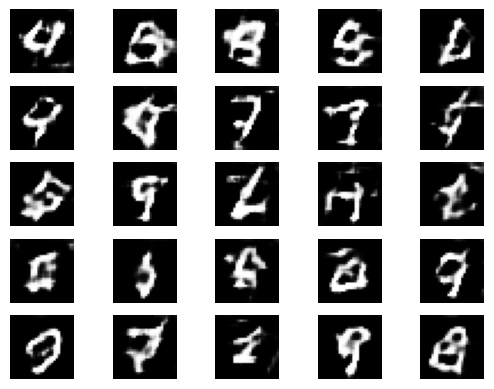

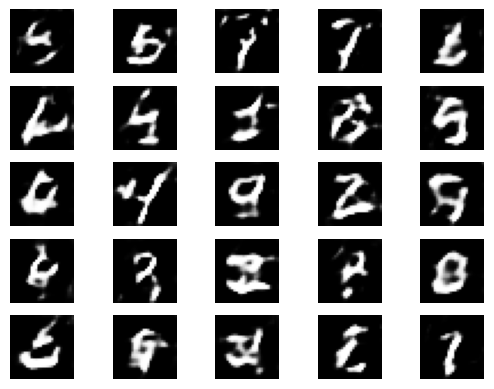

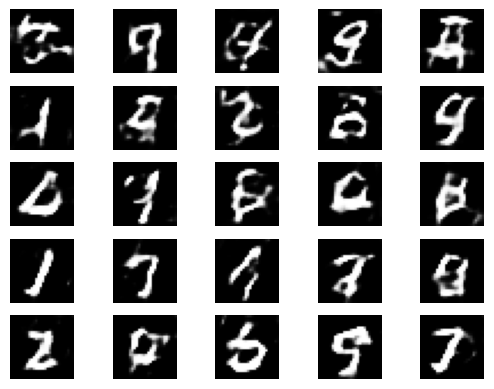

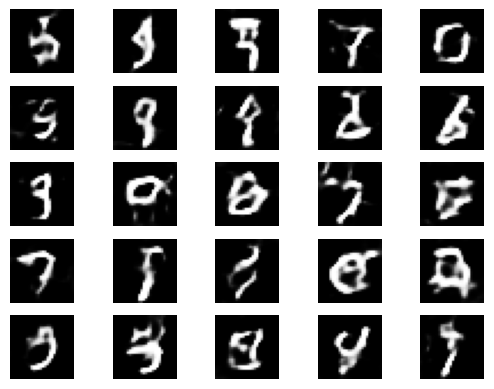

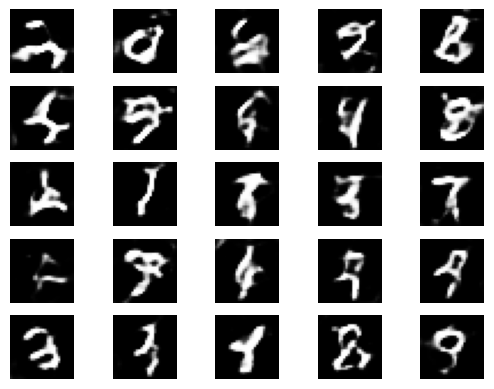

In [2]:
# 신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터를 불러옵니다.

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트 과정은 필요 없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀 값은 0에서 255 사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1 사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  # X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          # 가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          # 판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이 부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스 코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("./data/gan_images/gan_mnist_%d.png" % i)

gan_train(2001, 32, 200)  # 2000번 반복되고, 배치 사이즈는 32,  200번마다 결과가 저장되게 하였습니다.

## 4. 이미지의 특징을 추출하는 오토인코더

### 실습: 오토인코더 실습하기

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

# MNIST 데이터셋을 불러옵니다.

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델을 만듭니다.
autoencoder = Sequential()

# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분이 이어집니다. 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인해 봅니다.
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 8)          

Epoch 1/50
469/469 [==============================] - 7s 12ms/step - loss: 0.2049 - val_loss: 0.1305
Epoch 2/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1218 - val_loss: 0.1134
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1102 - val_loss: 0.1060
Epoch 4/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1045 - val_loss: 0.1013
Epoch 5/50
469/469 [==============================] - 5s 12ms/step - loss: 0.1010 - val_loss: 0.0986
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0986 - val_loss: 0.0963
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0967 - val_loss: 0.0948
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0953 - val_loss: 0.0936
Epoch 9/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0941 - val_loss: 0.0925
Epoch 10/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0932 - val_lo

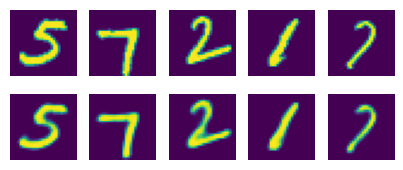

In [4]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, 
                validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()